<a href="https://colab.research.google.com/github/Ajkr27/Mobile-Sales-Dashbaord/blob/main/Mobile_Sales_Analysis_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
import warnings; warnings.filterwarnings('ignore')

# Read Excel
df = pd.read_excel('/content/Mobile Sales Data.xlsx')  # Google Colab path

# Add Total Sales column
df['Total Sales'] = df['Units Sold'] * df['Price Per Unit']

# Confirm data
df.head()


,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model,Total Sales
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10,61048.20
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51,63391.14
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1,468220.64
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11,127819.90
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9,144504.06


In [ ]:
df.head()


,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model,Total Sales,Age Group,Date,DayName
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10,61048.20,36-50,2021-10-09,Saturday
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51,63391.14,36-50,2021-10-09,Saturday
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1,468220.64,36-50,2021-10-09,Saturday
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11,127819.90,18-25,2021-10-10,Sunday
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9,144504.06,36-50,2021-10-10,Sunday


In [ ]:
print("Shape of Data:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of Data: (3835, 18)

Data Types:
 Transaction ID               int64
Day                          int64
Month                        int64
Year                         int64
Day Name                    object
Brand                       object
Units Sold                   int64
Price Per Unit             float64
Customer Name               object
Customer Age                 int64
City                        object
Payment Method              object
Customer Ratings             int64
Mobile Model                object
Total Sales                float64
Age Group                 category
Date                datetime64[ns]
DayName                     object
dtype: object

Missing Values:
 Transaction ID      0
Day                 0
Month               0
Year                0
Day Name            0
Brand               0
Units Sold          0
Price Per Unit      0
Customer Name       0
Customer Age        0
City                0
Payment Method      0
Customer Ratings    0
Mobile Model

In [ ]:
df.describe()


,Transaction ID,Day,Month,Year,Units Sold,Price Per Unit,Customer Age,Customer Ratings,Total Sales,Date
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835
mean,1918.000000,15.703781,6.527249,2022.765319,4.993481,40114.036816,38.098305,3.693090,200574.964269,2023-04-07 13:31:25.893090048
min,1.000000,1.000000,1.000000,2021.000000,1.000000,10011.110000,18.000000,1.000000,10115.910000,2021-10-09 00:00:00
25%,959.500000,8.000000,4.000000,2022.000000,3.000000,25617.405000,27.500000,3.000000,83930.940000,2022-07-10 00:00:00
50%,1918.000000,16.000000,7.000000,2023.000000,5.000000,40136.490000,38.000000,4.000000,163855.840000,2023-04-07 00:00:00
75%,2876.500000,23.000000,10.000000,2024.000000,7.000000,54973.475000,49.000000,5.000000,289246.935000,2024-01-05 00:00:00
max,3835.000000,31.000000,12.000000,2024.000000,9.000000,69984.480000,59.000000,5.000000,628391.790000,2024-10-08 00:00:00
std,1107.213469,8.822771,3.452030,0.917401,2.581122,17310.488427,12.110622,1.325069,142402.093904,NaN


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n", df[col].unique())



Unique values in 'Day Name':
 ['Sat' 'Saturday' 'Sunday' 'Sun' 'Monday' 'Mon' 'Tuesday' 'Wed'
 'Wednesday' 'Thursday' 'Thu' 'Friday' 'Fri' 'Tue']

Unique values in 'Brand':
 ['Xiaomi' 'Vivo' 'OnePlus' 'Samsung' 'Apple']

Unique values in 'Customer Name':
 ['Lalita Ahuja' 'Sneha Sharma' 'Radha Srivastava' 'Bhavana Arora'
 'Sneha Mehta' 'Reena Mehta' 'Pankaj Alva' 'Mala Rawat' 'Pankaj Varma'
 'Yogesh Sharma' 'Radha Sharma' 'Namita Roy' 'Ramesh Joshi' 'Arun Iyer'
 'Manoj Siddiqui' 'Anjali Gupta' 'Ramesh Rao' 'Anand Pillai' 'Kiran Rawat'
 'Harish Kaur' 'Manoj Luthra' 'Jyoti Roy' 'Rajesh Sheth' 'Mala Ghosh'
 'Reena Teja' 'Bhavana Dutta' 'Yogesh Ahuja' 'Isha Desai' 'Tapan Shah'
 'Vinod Pathak' 'Bhavana Siddiqui' 'Meena Mathur' 'Sumit Pillai'
 'Vinod Dutta' 'Shruti Bhatnagar' 'Pankaj Shah' 'Deepika Verma'
 'Sanjay Joshi' 'Umesh Goyal' 'Rajesh Verma' 'Pooja Rao' 'Jyoti Mishra'
 'Sachin Desai' 'Manoj Jain' 'Deepika Shah' 'Priyanka Pillai'
 'Pooja Arora' 'Tanuja Prasad' 'Monika Thakur' 'Anand N

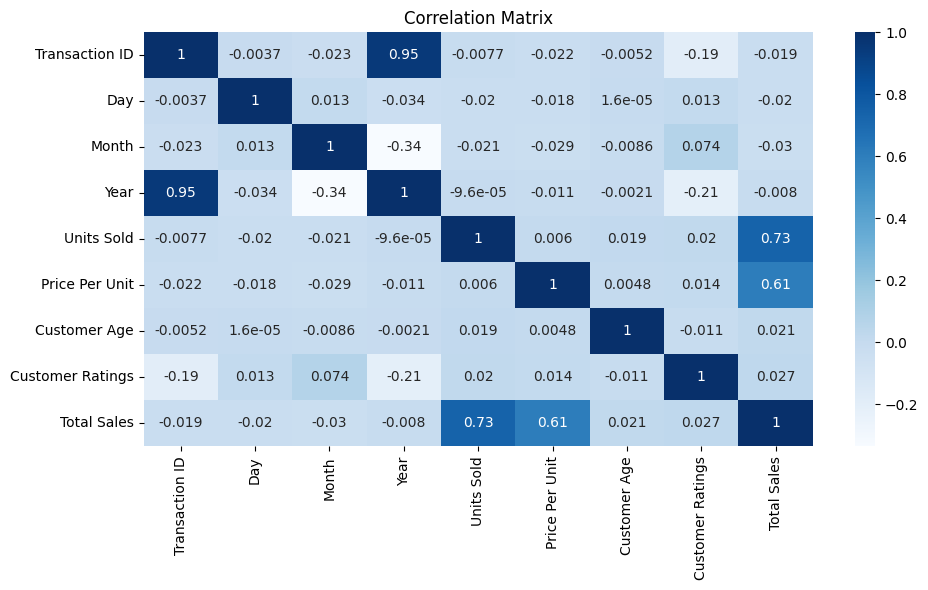

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [ ]:
df['Total Sales'] = df['Units Sold'] * df['Price Per Unit']



In [ ]:
df

,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model,Total Sales,Age Group,Date,DayName
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10,61048.20,36-50,2021-10-09,Saturday
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51,63391.14,36-50,2021-10-09,Saturday
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1,468220.64,36-50,2021-10-09,Saturday
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11,127819.90,18-25,2021-10-10,Sunday
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9,144504.06,36-50,2021-10-10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,3831,7,10,2024,Monday,OnePlus,9,43406.12,Kavita Bhatnagar,41,Mumbai,Cash,5,OnePlus 8T,390655.08,36-50,2024-10-07,Monday
3831,3832,8,10,2024,Tuesday,Xiaomi,8,34675.31,Vivek Sheth,25,Jodhpur,UPI,2,Redmi 9,277402.48,18-25,2024-10-08,Tuesday
3832,3833,8,10,2024,Tuesday,OnePlus,7,37620.23,Anita Desai,34,Vadodara,UPI,5,OnePlus 8T,263341.61,26-35,2024-10-08,Tuesday
3833,3834,8,10,2024,Tuesday,OnePlus,4,16961.04,Ayesha Rathod,51,Mumbai,Debit Card,5,OnePlus 8T,67844.16,50+,2024-10-08,Tuesday


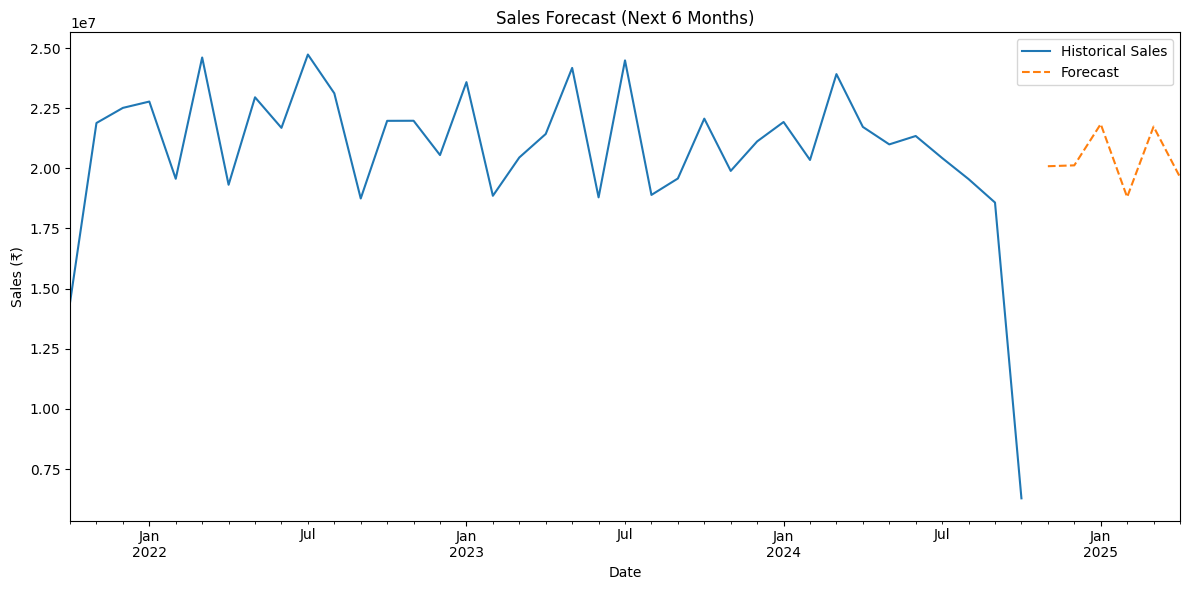

In [ ]:
# Monthly aggregation
monthly = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Convert to datetime
monthly['Date'] = pd.to_datetime(monthly[['Year', 'Month']].assign(DAY=1))
monthly.set_index('Date', inplace=True)
monthly = monthly['Total Sales'].asfreq('MS')

# Forecast
model = ExponentialSmoothing(monthly, trend='add', seasonal='add', seasonal_periods=12)
fitted = model.fit()
forecast = fitted.forecast(6)

# Plot
plt.figure(figsize=(12,6))
monthly.plot(label='Historical Sales')
forecast.plot(label='Forecast', style='--')
plt.title('Sales Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.legend()
plt.tight_layout()
plt.show()


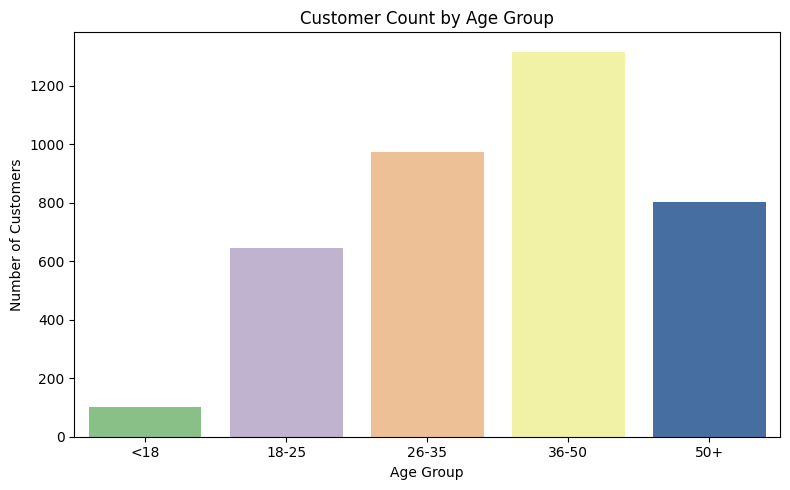

In [ ]:
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0,18,25,35,50,100],
                         labels=['<18', '18-25', '26-35', '36-50', '50+'])

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age Group', palette='Accent')
plt.title("Customer Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


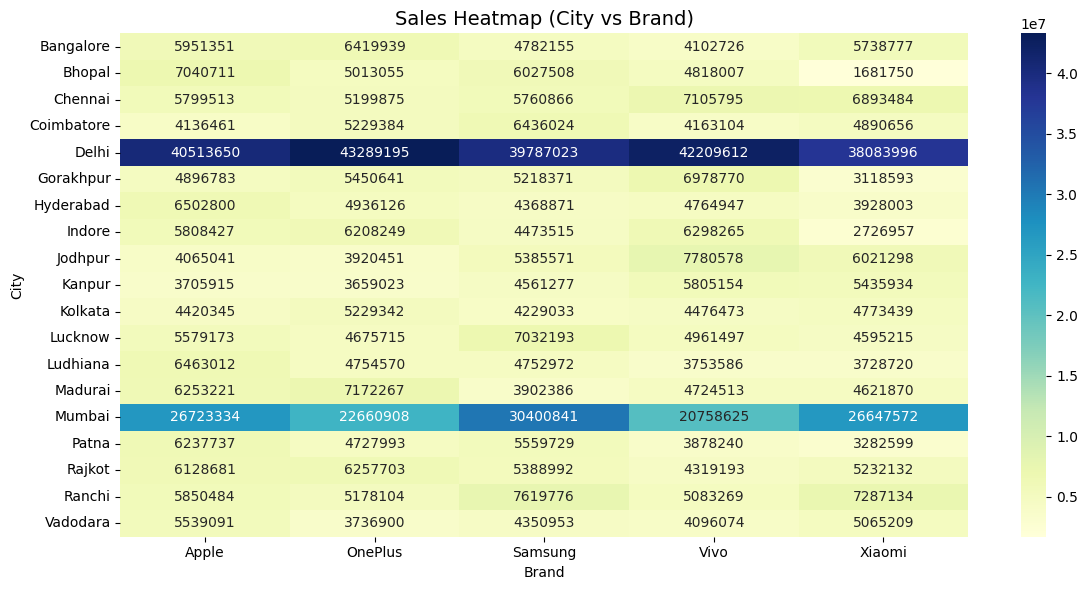

In [ ]:
pivot = df.pivot_table(values='Total Sales', index='City', columns='Brand', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Sales Heatmap (City vs Brand)", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("City")
plt.tight_layout()
plt.show()


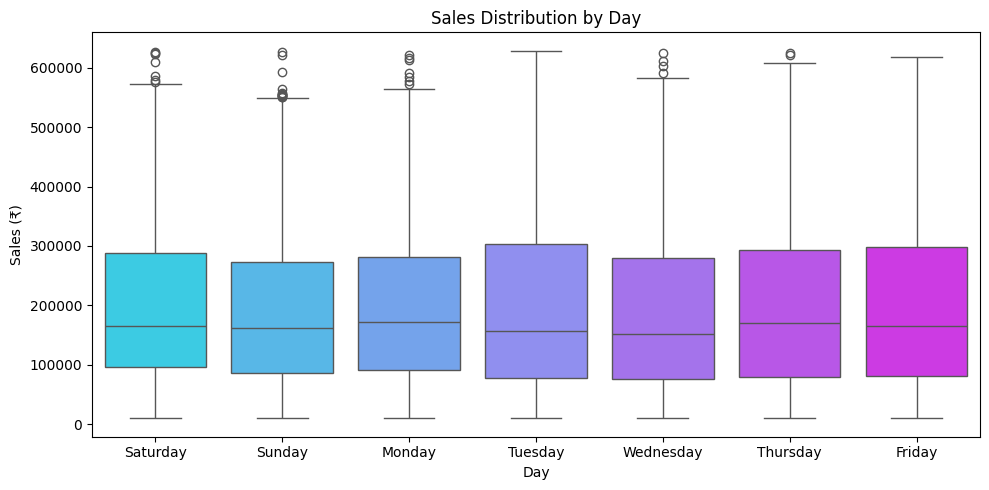

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['DayName'] = df['Date'].dt.day_name()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='DayName', y='Total Sales', palette='cool')
plt.title("Sales Distribution by Day")
plt.xlabel("Day")
plt.ylabel("Sales (₹)")
plt.tight_layout()
plt.show()


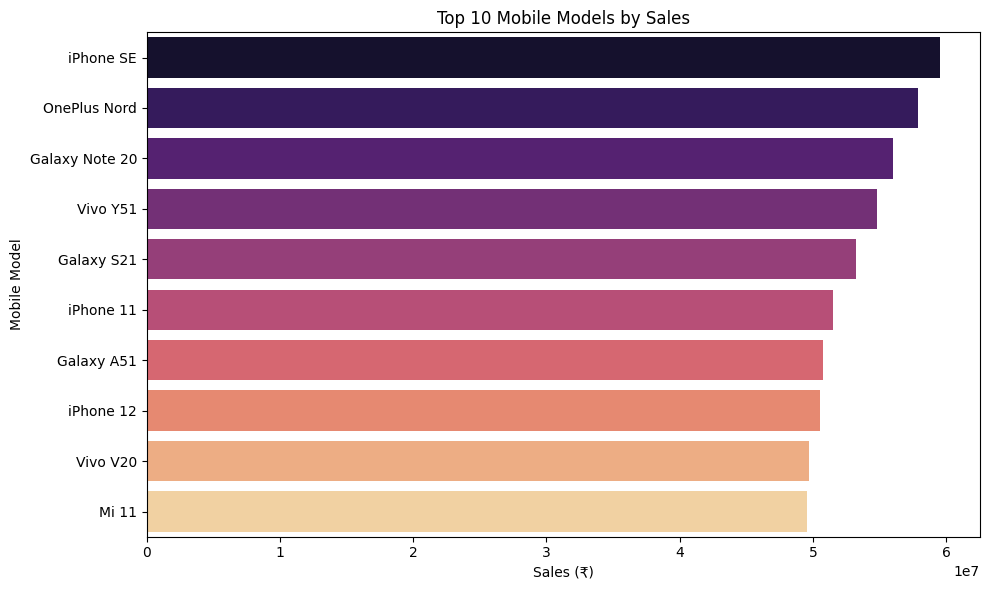

In [ ]:
top_models = df.groupby('Mobile Model')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_models.values, y=top_models.index, palette='magma')
plt.title("Top 10 Mobile Models by Sales")
plt.xlabel("Sales (₹)")
plt.ylabel("Mobile Model")
plt.tight_layout()
plt.show()


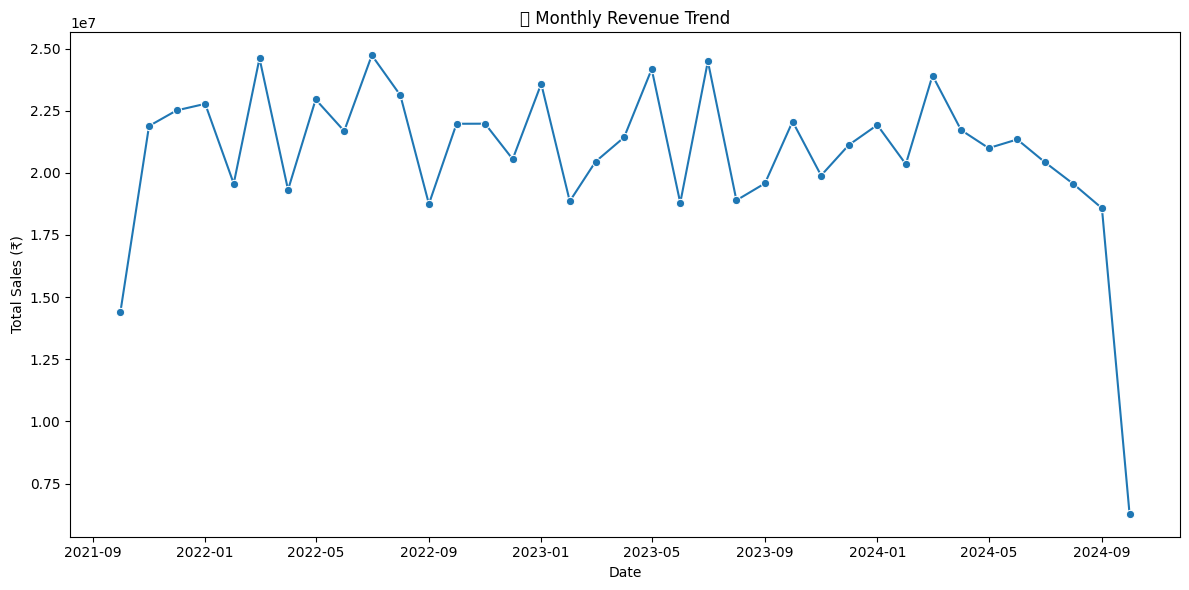

In [ ]:
monthly_revenue = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='Date', y='Total Sales', marker='o')
plt.title('📈 Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (₹)')
plt.tight_layout()
plt.show()


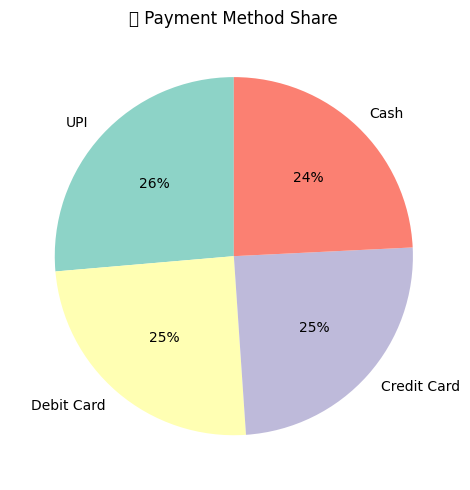

In [ ]:
plt.figure(figsize=(7,5))
df['Payment Method'].value_counts().plot.pie(autopct='%1.0f%%', colors=sns.color_palette('Set3'), startangle=90)
plt.title('💳 Payment Method Share')
plt.ylabel('')
plt.tight_layout()
plt.show()


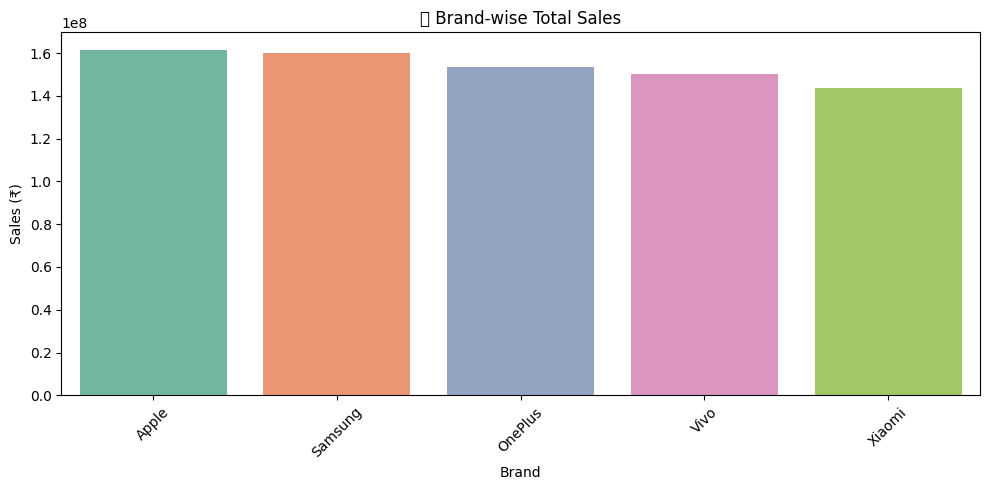

In [ ]:
brand_sales = df.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='Set2')
plt.title('🏷️ Brand-wise Total Sales')
plt.xlabel('Brand')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


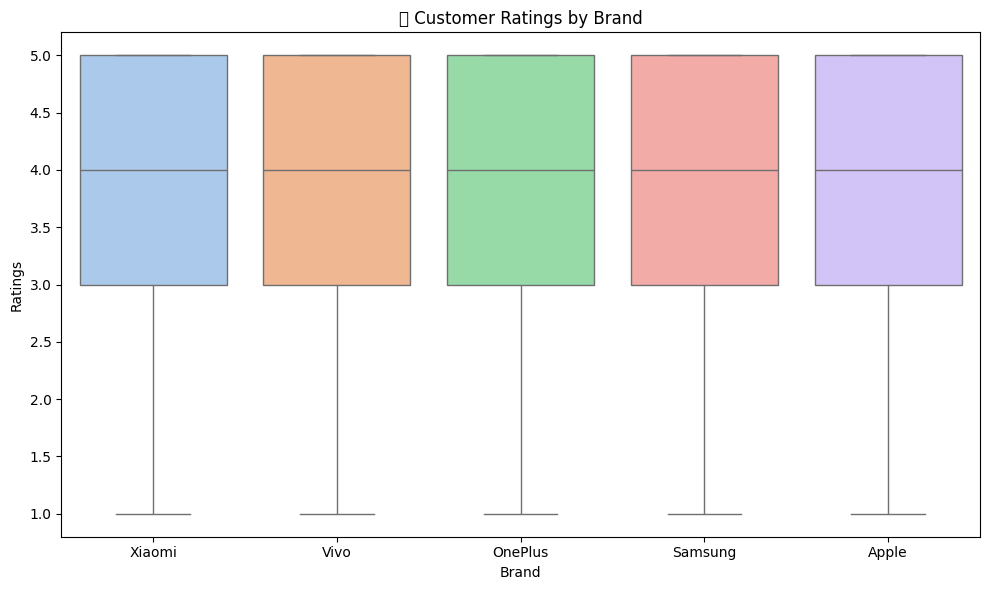

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Brand', y='Customer Ratings', palette='pastel')
plt.title('⭐ Customer Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()


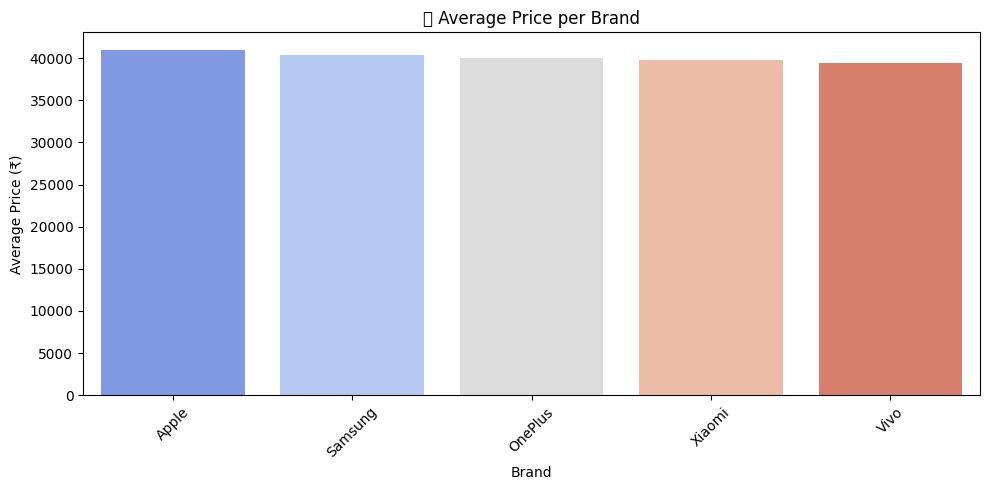

In [ ]:
avg_price = df.groupby('Brand')['Price Per Unit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title('💰 Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


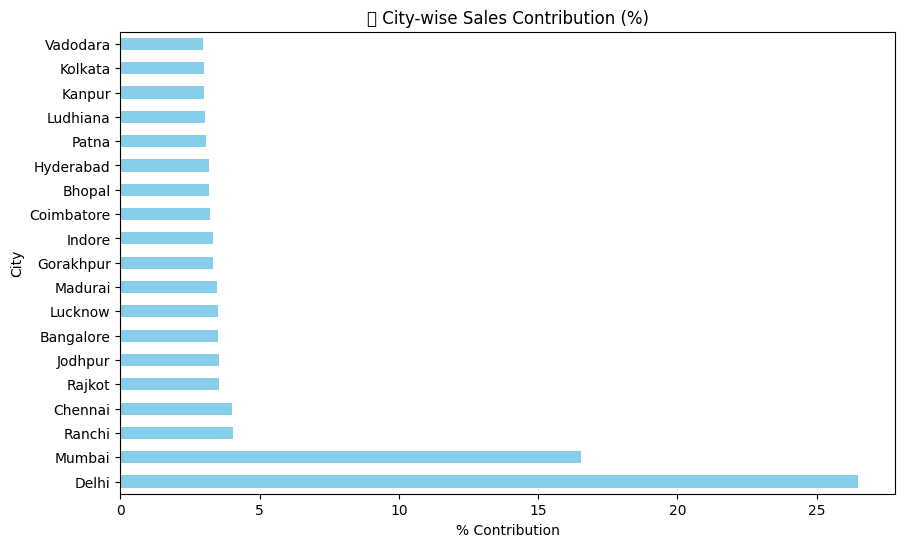

In [ ]:
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)
city_percent = city_sales / city_sales.sum() * 100

city_percent.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('🏙️ City-wise Sales Contribution (%)')
plt.xlabel('% Contribution')
plt.show()


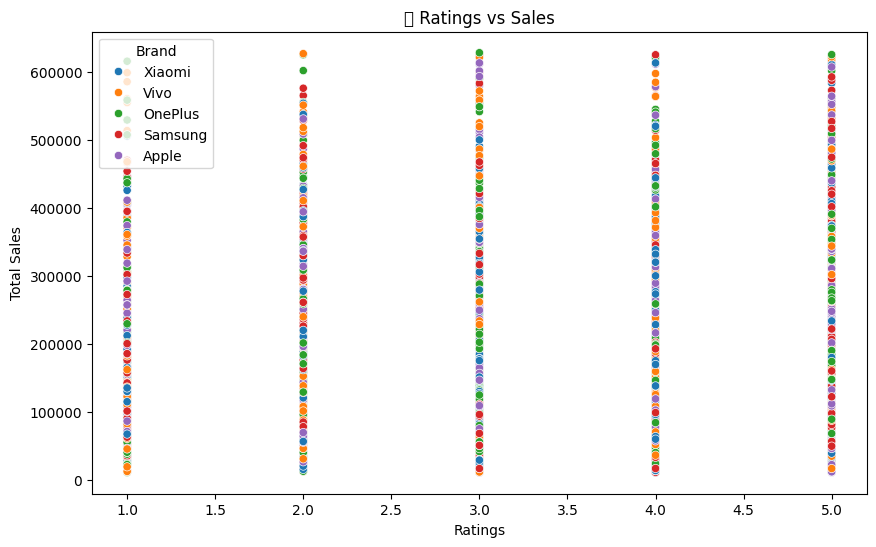

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Customer Ratings', y='Total Sales', hue='Brand')
plt.title('⭐ Ratings vs Sales')
plt.xlabel('Ratings')
plt.ylabel('Total Sales')
plt.show()


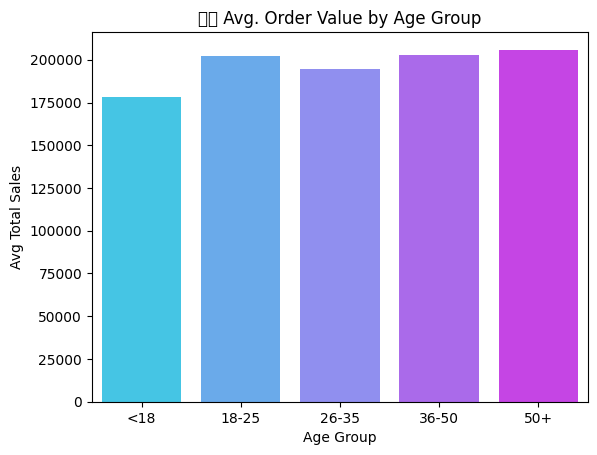

In [ ]:
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0,18,25,35,50,100], labels=['<18','18-25','26-35','36-50','50+'])

age_avg = df.groupby('Age Group')['Total Sales'].mean().reset_index()

sns.barplot(data=age_avg, x='Age Group', y='Total Sales', palette='cool')
plt.title('👶🧓 Avg. Order Value by Age Group')
plt.ylabel('Avg Total Sales')
plt.show()


In [ ]:
# Assuming 'Return Status' has 'Returned' or 'Not Returned'
if 'Return Status' in df.columns:
    return_rate = df['Return Status'].value_counts(normalize=True) * 100
    return_rate.plot(kind='pie', autopct='%1.1f%%', colors=['red','green'], title='📦 Return Rate', ylabel='')
    plt.show()


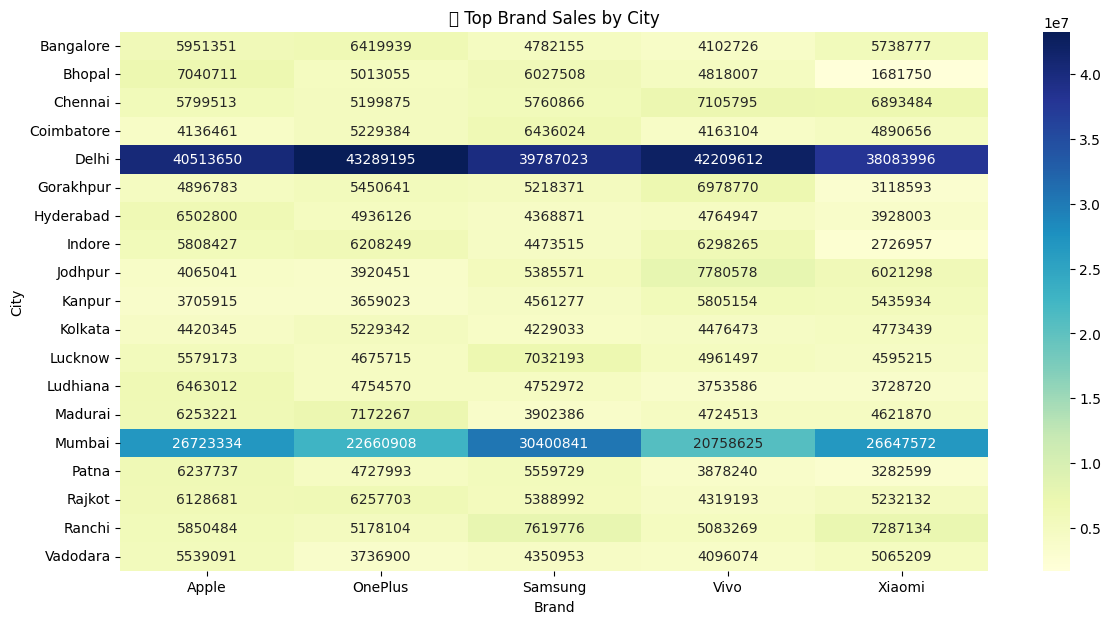

In [ ]:
city_brand = df.groupby(['City', 'Brand'])['Total Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(14,7))
sns.heatmap(city_brand, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("📍 Top Brand Sales by City")
plt.xlabel("Brand")
plt.ylabel("City")
plt.show()


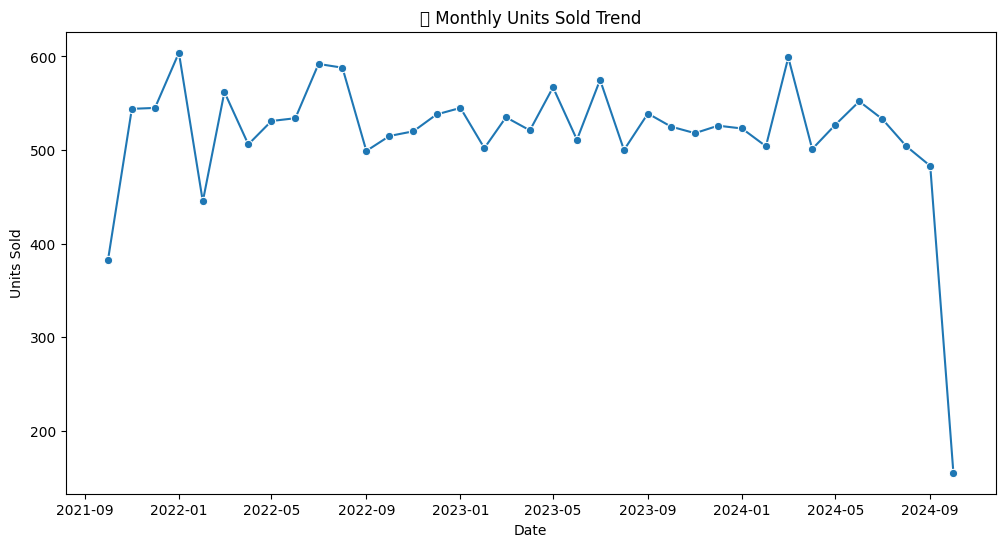

In [ ]:
monthly_units = df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()
monthly_units['Date'] = pd.to_datetime(monthly_units[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_units, x='Date', y='Units Sold', marker='o')
plt.title('📦 Monthly Units Sold Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()


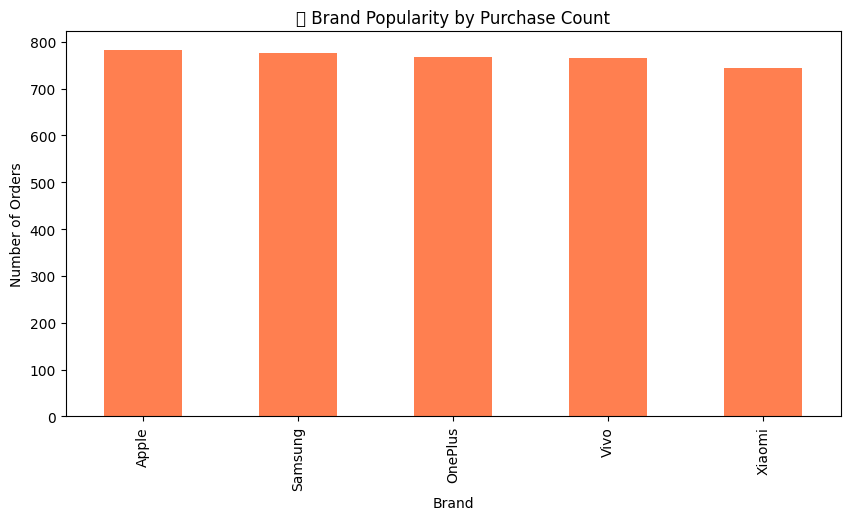

In [ ]:
plt.figure(figsize=(10,5))
df['Brand'].value_counts().plot(kind='bar', color='coral')
plt.title('🏷️ Brand Popularity by Purchase Count')
plt.xlabel('Brand')
plt.ylabel('Number of Orders')
plt.show()


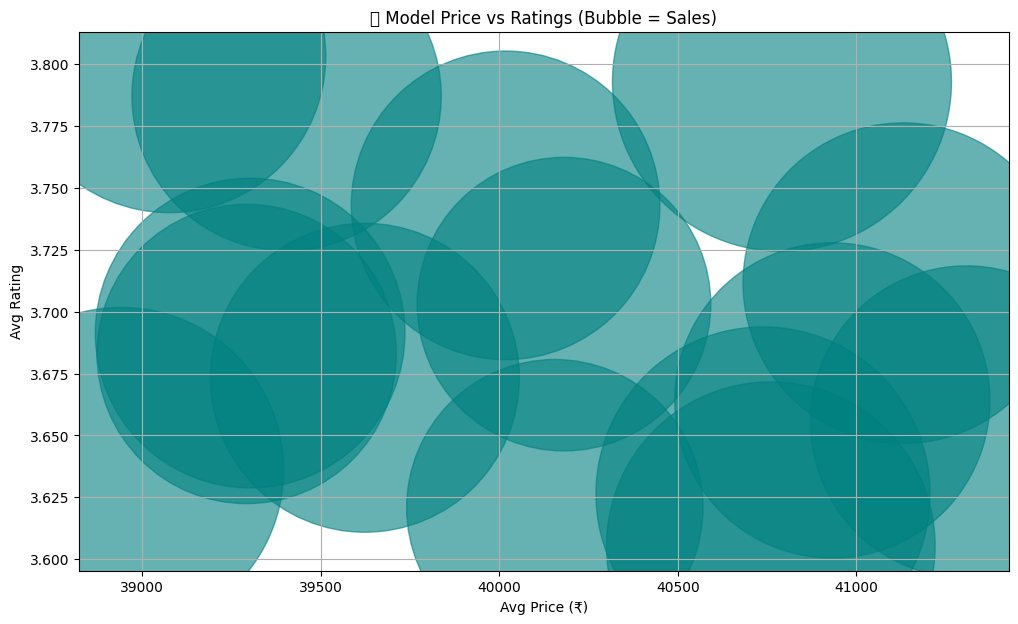

In [ ]:
model_data = df.groupby('Mobile Model').agg({
    'Price Per Unit': 'mean',
    'Customer Ratings': 'mean',
    'Total Sales': 'sum'
}).reset_index()

plt.figure(figsize=(12,7))
plt.scatter(model_data['Price Per Unit'], model_data['Customer Ratings'],
            s=model_data['Total Sales']/1000, alpha=0.6, c='teal')
plt.title('📱 Model Price vs Ratings (Bubble = Sales)')
plt.xlabel('Avg Price (₹)')
plt.ylabel('Avg Rating')
plt.grid(True)
plt.show()
